<a href="https://colab.research.google.com/github/lakshayae162/EDA/blob/main/Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 3 - EXERCISES**

## **Statistical Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)

In [3]:
data.head(10)

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y
5,6,21,F,S1WantCurse,yes,6,curse,other,want,Y
6,7,39,F,S1WantCurse,yes,7,curse,other,want,Y
7,8,21,F,S1WantCurse,no,8,curse,other,want,N
8,9,24,F,S1WantCurse,no,9,curse,other,want,N
9,10,16,F,S1WantCurse,yes,10,curse,other,want,Y


In [4]:
data.tail(10)

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
7574,7575,17,F,S4DoShout,no,307,shout,self,do,N
7575,7576,13,F,S4DoShout,no,308,shout,self,do,N
7576,7577,14,F,S4DoShout,no,309,shout,self,do,N
7577,7578,23,F,S4DoShout,no,310,shout,self,do,N
7578,7579,24,M,S4DoShout,no,311,shout,self,do,N
7579,7580,17,M,S4DoShout,no,312,shout,self,do,N
7580,7581,20,F,S4DoShout,no,313,shout,self,do,N
7581,7582,25,F,S4DoShout,no,314,shout,self,do,N
7582,7583,23,F,S4DoShout,no,315,shout,self,do,N
7583,7584,12,F,S4DoShout,no,316,shout,self,do,N


In [5]:
#Dimensions
print(data.shape)

(7584, 10)


In [6]:
#Summary
print(data.describe())
#Only gives for numeric labels

          rownames        Anger         id
count  7584.000000  7584.000000  7584.0000
mean   3792.500000    20.003165   158.5000
std    2189.456554     4.841139    91.2269
min       1.000000    11.000000     1.0000
25%    1896.750000    17.000000    79.7500
50%    3792.500000    19.000000   158.5000
75%    5688.250000    23.000000   237.2500
max    7584.000000    39.000000   316.0000


In [7]:
#Checking for missing values and counting
print(data.isnull().sum())

rownames    0
Anger       0
Gender      0
item        0
resp        0
id          0
btype       0
situ        0
mode        0
r2          0
dtype: int64


In [8]:
#Data types
print(data.dtypes)

rownames     int64
Anger        int64
Gender      object
item        object
resp        object
id           int64
btype       object
situ        object
mode        object
r2          object
dtype: object


In [9]:
#Detecting Outliers and handling
z_scores = (data['rownames'] - data['id'].mean()) / data['Anger'].std()
outliers = data[z_scores > 3]
print(outliers)

      rownames  Anger Gender         item     resp   id  btype   situ  mode r2
173        174     23      M  S1WantCurse       no  174  curse  other  want  N
174        175     23      F  S1WantCurse  perhaps  175  curse  other  want  Y
175        176     23      F  S1WantCurse      yes  176  curse  other  want  Y
176        177     18      M  S1WantCurse  perhaps  177  curse  other  want  Y
177        178     22      F  S1WantCurse       no  178  curse  other  want  N
...        ...    ...    ...          ...      ...  ...    ...    ...   ... ..
7579      7580     17      M    S4DoShout       no  312  shout   self    do  N
7580      7581     20      F    S4DoShout       no  313  shout   self    do  N
7581      7582     25      F    S4DoShout       no  314  shout   self    do  N
7582      7583     23      F    S4DoShout       no  315  shout   self    do  N
7583      7584     12      F    S4DoShout       no  316  shout   self    do  N

[7411 rows x 10 columns]


### **Data Cleaning**

In [12]:
data_cleaned = data.drop_duplicates()
print(f"Number of duplicate rows removed: {data.shape[0] - data_cleaned.shape[0]}")

any_missing_values = data.isnull().values.any()
print(f"\nDoes the dataset contain any missing values? {any_missing_values}")

Number of duplicate rows removed: 0

Does the dataset contain any missing values? False


## **Central Measures of Tendency**

In [13]:
# Mean, Median, Mode for the 'Anger' column (numeric example)
mean_anger = data_cleaned['Anger'].mean()
median_anger = data_cleaned['Anger'].median()
mode_anger = data_cleaned['Anger'].mode()[0]

print(f"Mean of Anger: {mean_anger}")
print(f"Median of Anger: {median_anger}")
print(f"Mode of Anger: {mode_anger}")


Mean of Anger: 20.003164556962027
Median of Anger: 19.0
Mode of Anger: 19


## **UNIVARIATE ANALYSIS**

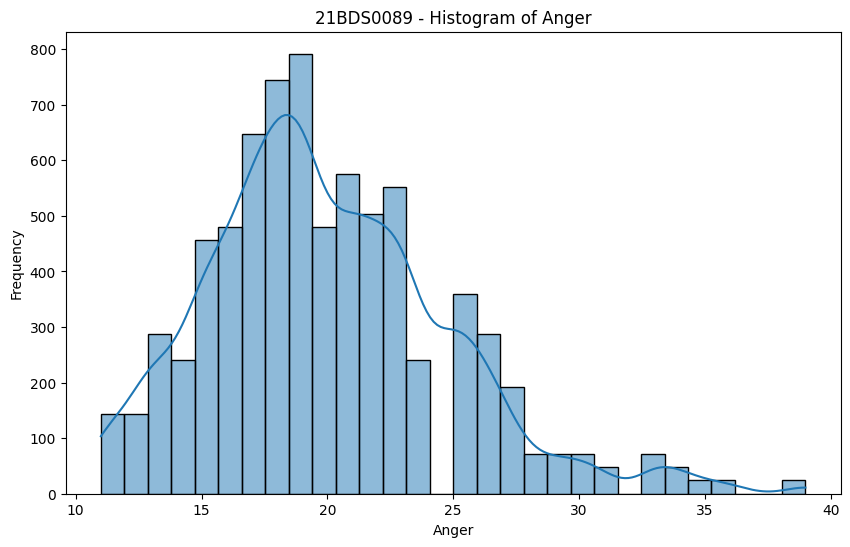

In [20]:
#HISTOGRAM - Anger
plt.figure(figsize=(10, 6))
sns.histplot(data['Anger'], bins=30, kde=True)
plt.title('21BDS0089 - Histogram of Anger')
plt.xlabel('Anger')
plt.ylabel('Frequency')
plt.show()

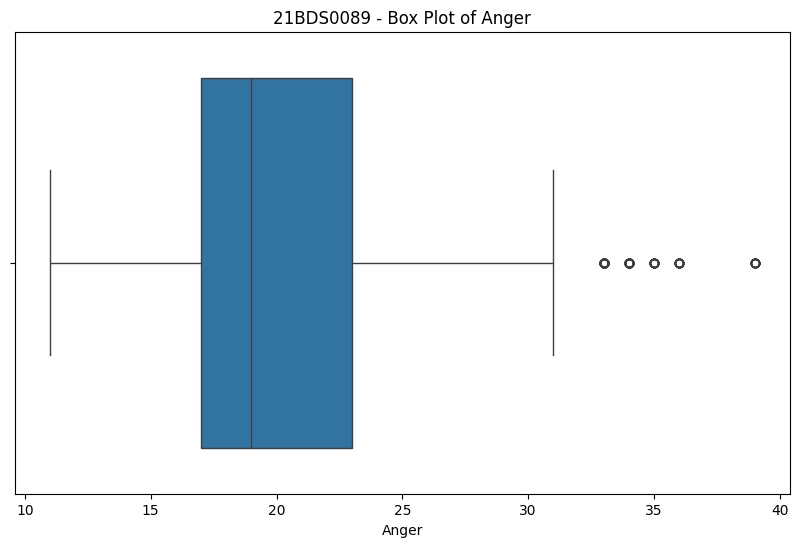

In [19]:
# Box plot - Anger
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Anger'])
plt.title('21BDS0089 - Box Plot of Anger')
plt.xlabel('Anger')
plt.show()

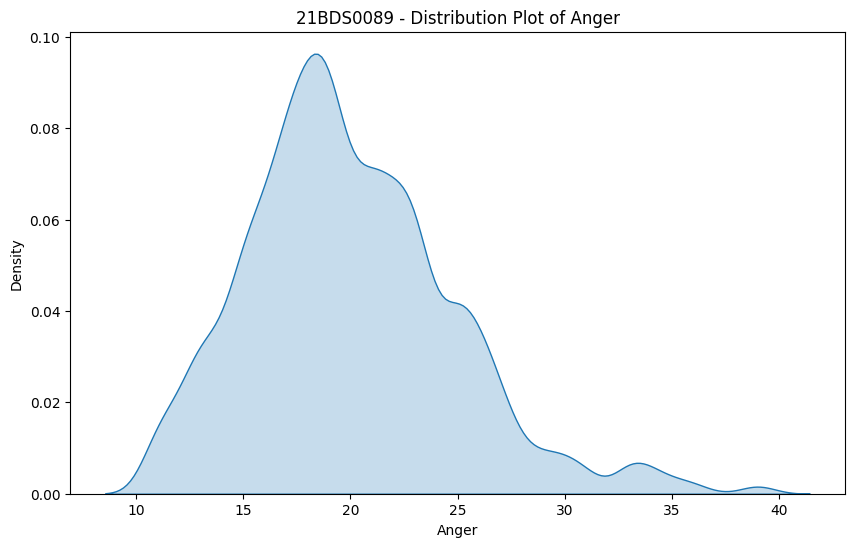

In [23]:
# Distribution plot - Anger
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Anger'], fill=True)
plt.title('21BDS0089 - Distribution Plot of Anger')
plt.xlabel('Anger')
plt.ylabel('Density')
plt.show()

## **BIVARIATE ANALYSIS**

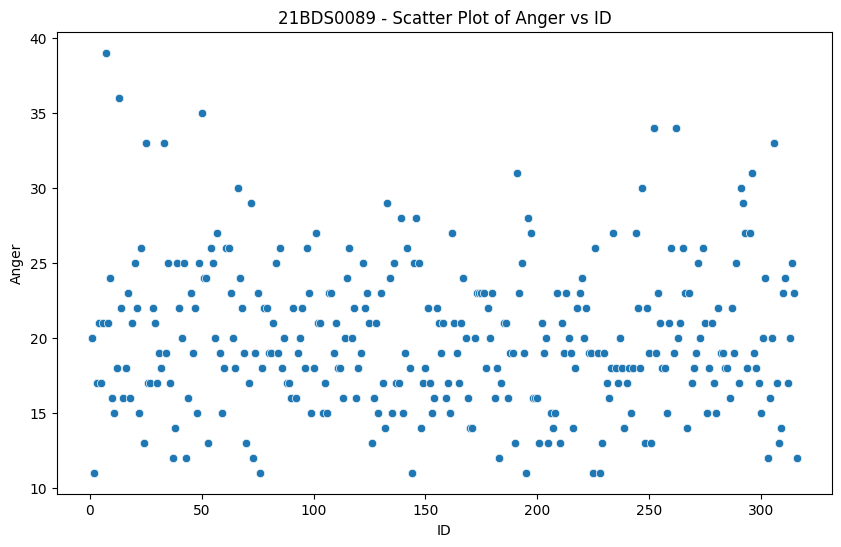

In [25]:
# Scatter plot - 'Anger' vs 'id'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['id'], y=data['Anger'])
plt.title('21BDS0089 - Scatter Plot of Anger vs ID')
plt.xlabel('ID')
plt.ylabel('Anger')
plt.show()

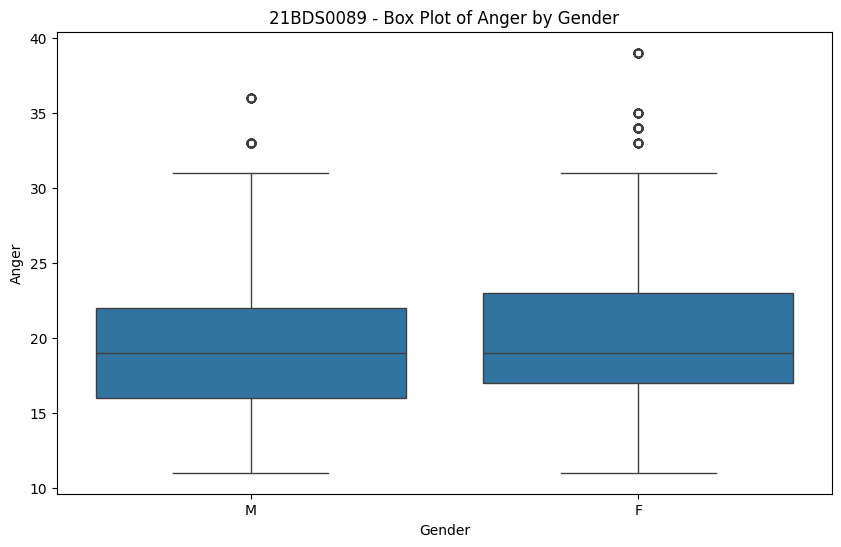

In [26]:
# Box plot - 'Anger' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Anger', data=data)
plt.title('21BDS0089 - Box Plot of Anger by Gender')
plt.xlabel('Gender')
plt.ylabel('Anger')
plt.show()

## **MULTIVARIATE ANALYSIS**

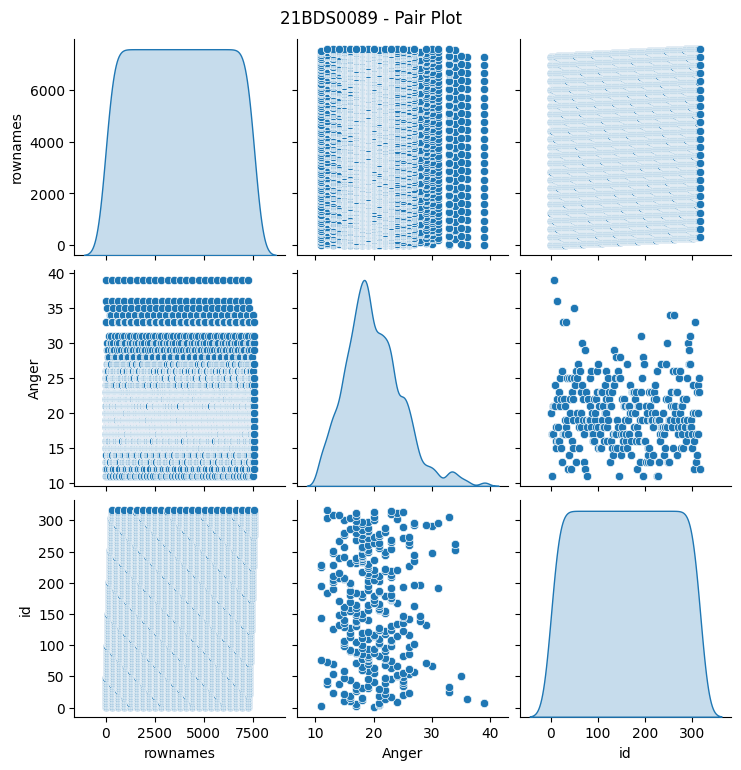

In [29]:
# Pair plot
sns.pairplot(data, diag_kind='kde')
plt.suptitle('21BDS0089 - Pair Plot', y=1.02)
plt.show()

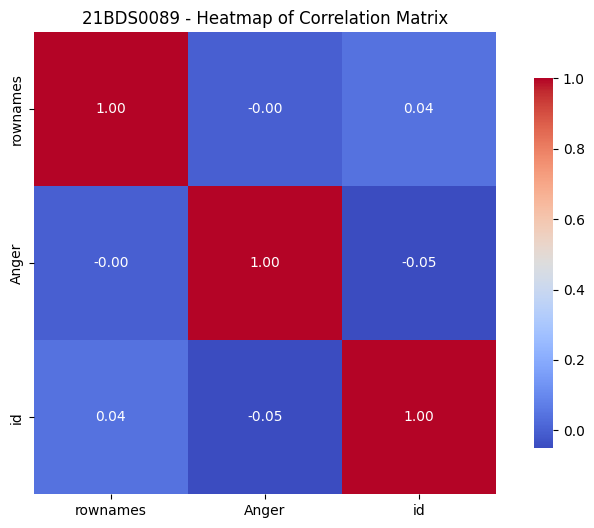

In [31]:
# Heatmap of correlations
numeric_df = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('21BDS0089 - Heatmap of Correlation Matrix')
plt.show()